In [1]:
pip install seaborn


In [2]:
pip install matplotlib


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
dfAir = pd.read_csv("\\Users\\User\\OneDrive\\Desktop\\Airline Analysis in Python\\Airline_Analysis.csv")

In [5]:
dfAir.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,3,5,2,5,5,5,3,5,5,Neutral or Dissatisfied
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,5,4,5,5,3,5,2,5,5,Satisfied
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,3,5,3,5,5,3,4,3,3,Satisfied
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,5,4,4,5,2,5,5,Satisfied
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,3,4,4,5,4,3,3,3,3,Satisfied


In [6]:
print(dfAir.shape)

(129880, 24)


In [7]:
print(dfAir.isnull().sum())


ID                                          0
Gender                                      0
Age                                         0
Customer Type                               0
Type of Travel                              0
Class                                       0
Flight Distance                             0
Departure Delay                             0
Arrival Delay                             393
Departure and Arrival Time Convenience      0
Ease of Online Booking                      0
Check-in Service                            0
Online Boarding                             0
Gate Location                               0
On-board Service                            0
Seat Comfort                                0
Leg Room Service                            0
Cleanliness                                 0
Food and Drink                              0
In-flight Service                           0
In-flight Wifi Service                      0
In-flight Entertainment           

In [8]:
dfAir.dropna(inplace=True)
print(dfAir.isnull().sum())




ID                                        0
Gender                                    0
Age                                       0
Customer Type                             0
Type of Travel                            0
Class                                     0
Flight Distance                           0
Departure Delay                           0
Arrival Delay                             0
Departure and Arrival Time Convenience    0
Ease of Online Booking                    0
Check-in Service                          0
Online Boarding                           0
Gate Location                             0
On-board Service                          0
Seat Comfort                              0
Leg Room Service                          0
Cleanliness                               0
Food and Drink                            0
In-flight Service                         0
In-flight Wifi Service                    0
In-flight Entertainment                   0
Baggage Handling                

In [9]:
print(dfAir.describe())


                  ID            Age  Flight Distance  Departure Delay  \
count  129487.000000  129487.000000    129487.000000    129487.000000   
mean    64958.335169      39.428761      1190.210662        14.643385   
std     37489.781165      15.117597       997.560954        37.932867   
min         1.000000       7.000000        31.000000         0.000000   
25%     32494.500000      27.000000       414.000000         0.000000   
50%     64972.000000      40.000000       844.000000         0.000000   
75%     97415.500000      51.000000      1744.000000        12.000000   
max    129880.000000      85.000000      4983.000000      1592.000000   

       Arrival Delay  Departure and Arrival Time Convenience  \
count  129487.000000                           129487.000000   
mean       15.091129                                3.057349   
std        38.465650                                1.526787   
min         0.000000                                0.000000   
25%         0.000000  

In [10]:
print(dfAir.dtypes)

ID                                          int64
Gender                                     object
Age                                         int64
Customer Type                              object
Type of Travel                             object
Class                                      object
Flight Distance                             int64
Departure Delay                             int64
Arrival Delay                             float64
Departure and Arrival Time Convenience      int64
Ease of Online Booking                      int64
Check-in Service                            int64
Online Boarding                             int64
Gate Location                               int64
On-board Service                            int64
Seat Comfort                                int64
Leg Room Service                            int64
Cleanliness                                 int64
Food and Drink                              int64
In-flight Service                           int64


c:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


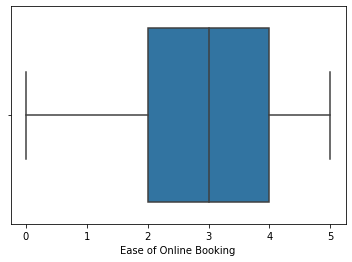

In [11]:

sns.boxplot(dfAir['Ease of Online Booking'])
plt.show()





<AxesSubplot:>

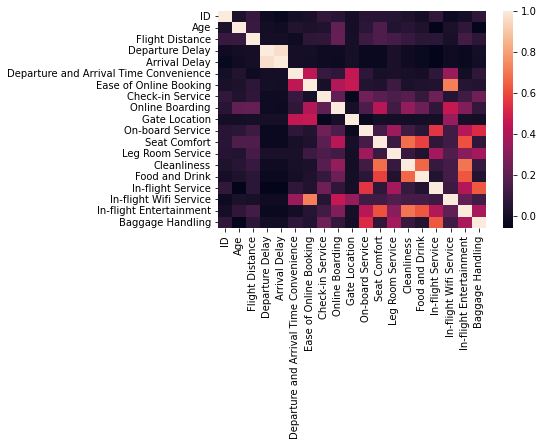

In [12]:
corr = dfAir.corr()
sns.heatmap(corr, annot=False)


<AxesSubplot:xlabel='Type of Travel', ylabel='Seat Comfort'>

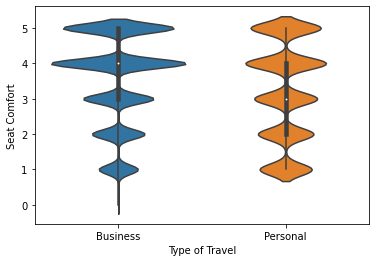

In [13]:

sns.violinplot(x='Type of Travel', y='Seat Comfort', data=dfAir)

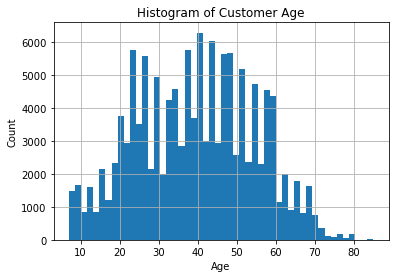

In [14]:
dfAir['Age'].hist(bins=50)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Customer Age')
plt.show()

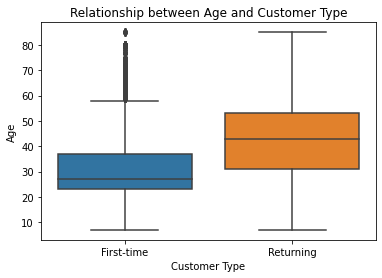

In [15]:
sns.boxplot(x='Customer Type', y='Age', data=dfAir)
plt.xlabel('Customer Type')
plt.ylabel('Age')
plt.title('Relationship between Age and Customer Type')
plt.show()

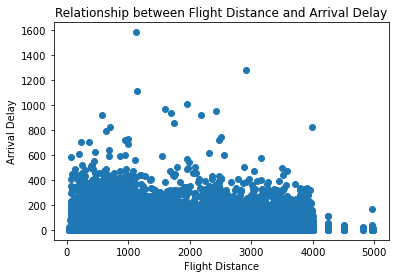

In [16]:


plt.scatter(dfAir['Flight Distance'], dfAir['Arrival Delay'])
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay')
plt.title('Relationship between Flight Distance and Arrival Delay')
plt.show()


In [17]:
pip install statsmodel


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


In [18]:
import statsmodels.api as sm



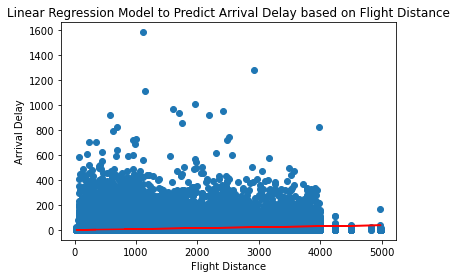

In [19]:


import statsmodels.api as sm

X = dfAir['Flight Distance'].values.reshape(-1, 1)
y = dfAir['Arrival Delay']

model = sm.OLS(y, X).fit()

predictions = model.predict(X)

plt.scatter(X, y)
plt.plot(X, predictions, color='red')
plt.xlabel('Flight Distance')
plt.ylabel('Arrival Delay')
plt.title('Linear Regression Model to Predict Arrival Delay based on Flight Distance')
plt.show()


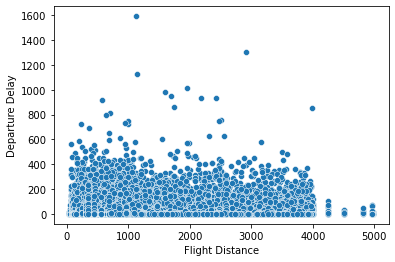

In [20]:
sns.scatterplot(x='Flight Distance', y='Departure Delay', data=dfAir)
plt.show()

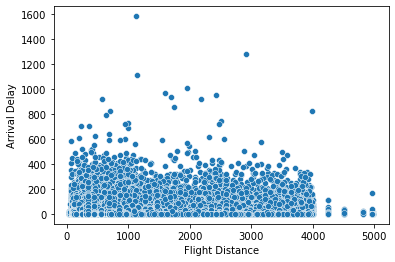

In [21]:
sns.scatterplot(x='Flight Distance', y='Arrival Delay', data=dfAir)
plt.show()

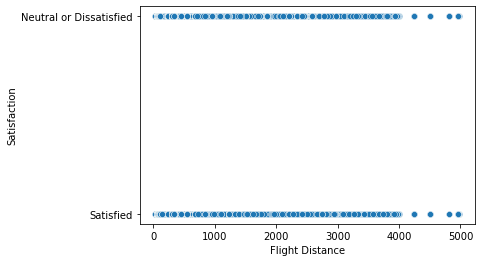

In [22]:
sns.scatterplot(x='Flight Distance', y='Satisfaction', data=dfAir)
plt.show()

In [23]:
X = dfAir['Flight Distance']
X = sm.add_constant(X)

y = dfAir['Departure Delay']
model = sm.OLS(y, X).fit()
print(model.summary())

y = dfAir['Arrival Delay']
model = sm.OLS(y, X).fit()
print(model.summary())

plt.show()








                            OLS Regression Results                            
Dep. Variable:        Departure Delay   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5139
Date:                Sat, 04 Feb 2023   Prob (F-statistic):              0.473
Time:                        19:46:11   Log-Likelihood:            -6.5452e+05
No. Observations:              129487   AIC:                         1.309e+06
Df Residuals:                  129485   BIC:                         1.309e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              14.5532      0.164     

In [24]:
from scipy.stats import pearsonr

In [25]:
flight_distance = dfAir['Flight Distance'].dropna()
departure_delay = dfAir['Departure Delay'].dropna()
arrival_delay = dfAir['Arrival Delay'].dropna()

flight_distance = flight_distance[~np.isinf(flight_distance)]
departure_delay = departure_delay[~np.isinf(departure_delay)]
arrival_delay = arrival_delay[~np.isinf(arrival_delay)]



In [26]:
r, p_value = pearsonr(flight_distance, departure_delay)
print("Pearson correlation between Flight Distance and Departure Delay: ", r)
print("p-value: ", p_value)

### H0: There is no relationship between the two variables
### H1: There is a relationship between the two variables

## We accept the null Hypothesis as because the p-value came >0.05

Pearson correlation between Flight Distance and Departure Delay:  0.0019921093671112196
p-value:  0.4734725529963883


In [27]:
r, p_value = pearsonr(flight_distance, arrival_delay)
print("Pearson correlation between Flight Distance and Arrival Delay: ", r)
print("p-value: ", p_value)

### H0: There is no relationship between the two variables
### H1: There is a relationship between the two variables

## We accept the null Hypothesis as because the p-value came >0.05

Pearson correlation between Flight Distance and Arrival Delay:  -0.0019345473636829583
p-value:  0.48634911155982147


In [28]:
### OUTCOME OF THE ABOVE CORRELATION CALCULATIONS #####
# This analysis suggests that there is no correlation 
# or significant association between flight distance and arrival/departure delays in the airline dataset. 
# This could mean that other factors, such as weather conditions, air traffic control, and aircraft maintenance, 
# have a greater impact on arrival/departure delays than flight distance.

In [29]:
from scipy.stats import chi2_contingency




In [30]:
ctab = pd.crosstab(dfAir['Customer Type'], dfAir['Satisfaction'])

stat, p, dof, expected = chi2_contingency(ctab)

In [31]:
print("Chi-squared statistic: ", stat)
print("p-value: ", p)
print("Degrees of freedom: ", dof)
print("Expected frequencies: \n", expected)


Chi-squared statistic:  4475.155050825033
p-value:  0.0
Degrees of freedom:  1
Expected frequencies: 
 [[13410.28558851 10303.71441149]
 [59814.71441149 45958.28558851]]


In [32]:
#H0: (Null Hypothesis): There is no significant relationship between customer type (first-time or returning) and customer satisfaction.

#H1: (Alternative Hypothesis): There is a significant relationship between customer type (first-time or returning) and customer satisfaction.

###the p-value is less than or equal to 0.05, we reject the null hypothesis and conclude that there is 
# a significant relationship between customer type (first-time or returning) and 
# customer satisfaction. So, in this case, since the p-value is 0.0 which is less than 0.05, 
# we can reject the null hypothesis and conclude that there is a significant relationship between customer type (first-time or returning) and
# customer satisfaction

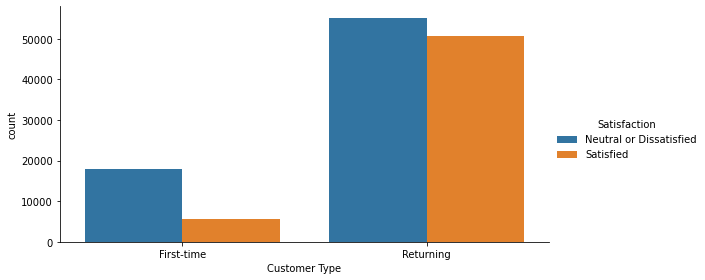

In [33]:
# CREATING A STACKED BARPLOT TO VISUALIZE THE CUSTOMER TYPE AND SATISFACTION
sns.catplot(x='Customer Type', hue='Satisfaction', kind='count',
           data=dfAir, height=4, aspect=2)
plt.show()


In [34]:
grouped = dfAir.groupby('Customer Type')['Satisfaction'].value_counts()
print(grouped)


Customer Type  Satisfaction           
First-time     Neutral or Dissatisfied    18026
               Satisfied                   5688
Returning      Neutral or Dissatisfied    55199
               Satisfied                  50574
Name: Satisfaction, dtype: int64


In [35]:
bins = [7, 25, 45, 65, 85]
labels = ['7-25', '26-45', '46-65', '66-85']
dfAir['Age Group'] = pd.cut(dfAir['Age'], bins=bins, labels=labels, right=False)


In [36]:
dfAir.head()

,ID,Gender,Age,Customer Type,Type of Travel,Class,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,...,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling,Satisfaction,Age Group
0,1,Male,48,First-time,Business,Business,821,2,5.0,3,...,5,2,5,5,5,3,5,5,Neutral or Dissatisfied,46-65
1,2,Female,35,Returning,Business,Business,821,26,39.0,2,...,4,5,5,3,5,2,5,5,Satisfied,26-45
2,3,Male,41,Returning,Business,Business,853,0,0.0,4,...,5,3,5,5,3,4,3,3,Satisfied,26-45
3,4,Male,50,Returning,Business,Business,1905,0,0.0,2,...,5,5,4,4,5,2,5,5,Satisfied,46-65
4,5,Female,49,Returning,Business,Business,3470,0,1.0,3,...,4,4,5,4,3,3,3,3,Satisfied,46-65


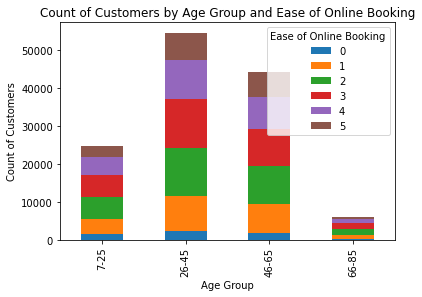

In [37]:
# Group the data by the age group and "Ease of Online Booking" score columns
grouped = dfAir.groupby(['Age Group', 'Ease of Online Booking'])

# Calculate the number of customers in each group
grouped_count = grouped.count()['ID']

# Plot the results
grouped_count.unstack().plot(kind='bar', stacked=True)
plt.xlabel("Age Group")
plt.ylabel("Count of Customers")
plt.title("Count of Customers by Age Group and Ease of Online Booking")
plt.show()




In [38]:
# create pivot table
table = pd.pivot_table(dfAir, values='ID', index='Age Group', columns='Ease of Online Booking', aggfunc='count')

# show table
print(table)

Ease of Online Booking     0     1      2      3      4     5
Age Group                                                    
7-25                    1464  3859   5900   5915   4600  2850
26-45                   2174  9239  12689  12926  10243  7333
46-65                   1753  7679   9884   9950   8466  6597
66-85                    275  1027   1506   1500   1047   586


In [39]:
#What is the impact of in-flight amenities such as seat comfort, in-flight entertainment, food and drink, etc. on customer satisfaction?
# Group by satisfaction first 
grouped = dfAir.groupby("Satisfaction").mean()
# Get the mean of the in-flight amenities columns
in_flight_amenities = ['Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment']
impact = grouped[in_flight_amenities]

<AxesSubplot:xlabel='Satisfaction'>

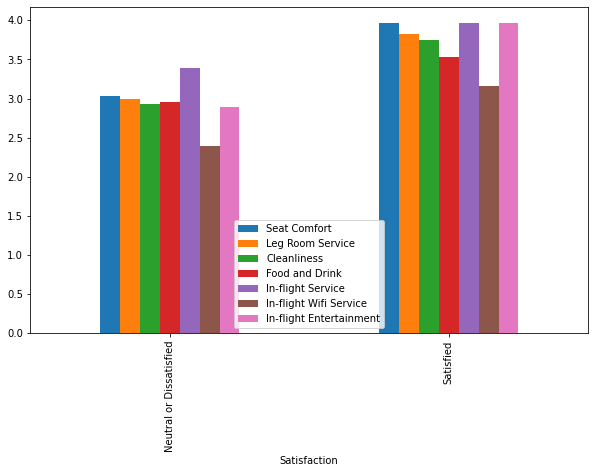

In [40]:
# Visualize the result as a bar plot
impact.plot(kind='bar', figsize=(10, 6))

In [41]:
from scipy import stats
#Creating a T test in order to check if flight amentities play a role on the satisfacttion level

In [42]:
# Create a dataframe for customers who reported high satisfaction
df_high_satisfaction = dfAir[dfAir['Satisfaction'] == 'Satisfied']

# Create a dataframe for customers who reported low satisfaction
df_low_satisfaction = dfAir[dfAir['Satisfaction'] == 'Neutral or Dissatisfied']

In [43]:
# Calculate the mean of the numeric variables for the two groups
mean_high_satisfaction = df_high_satisfaction[['Seat Comfort', 'In-flight Entertainment', 'Food and Drink']].mean()
mean_low_satisfaction = df_low_satisfaction[['Seat Comfort', 'In-flight Entertainment', 'Food and Drink']].mean()


In [44]:
# Perform the t-test
t_statistic, p_value = stats.ttest_ind(mean_high_satisfaction, mean_low_satisfaction)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)


T-statistic: 5.6017803790162155
P-value: 0.0049864002033048185


In [45]:
#H0: There is no significant difference between the means of the satisfaction scores for customers who received a specific 
#in-flight amenity (such as seat comfort, in-flight entertainment, food and drink, etc.) and customers who did not receive that specific amenity.

#H1: there is a significant difference in the means of the satisfaction scores between these two groups, 
# implying that the in-flight amenity in question has an impact on customer satisfaction.

#We accept the Hypothesis number 1.



<AxesSubplot:xlabel='Class'>

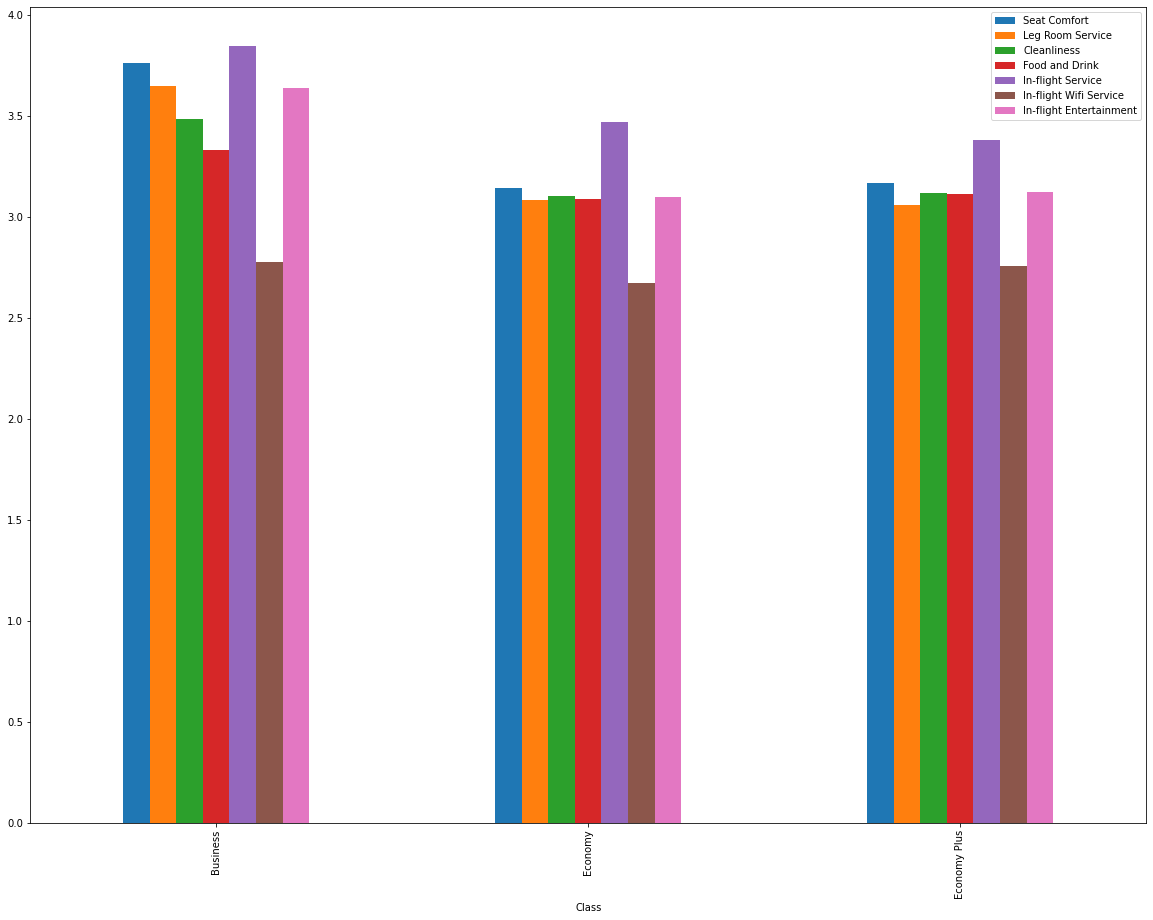

In [46]:
# Group by satisfaction
grouped = dfAir.groupby("Class").mean()

# Get the mean of the in-flight amenities columns
in_flight_amenities = ['Seat Comfort', 'Leg Room Service', 'Cleanliness', 'Food and Drink', 'In-flight Service', 'In-flight Wifi Service', 'In-flight Entertainment']
impact = grouped[in_flight_amenities]

# Visualize the result as a bar plot
impact.plot(kind='bar', figsize=(20, 15))

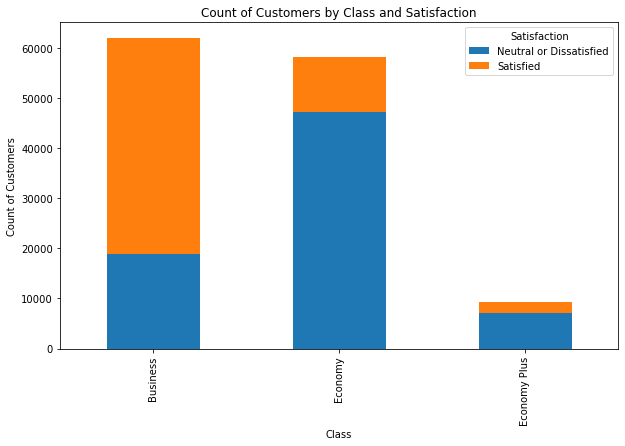

In [47]:
# Group the data by the Class and "Satisfaction" score columns
grouped = dfAir.groupby(['Class', 'Satisfaction'])

# Calculate the number of customers in each group
grouped_count = grouped.count()['ID']

# Plot the results
grouped_count.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Class")
plt.ylabel("Count of Customers")
plt.title("Count of Customers by Class and Satisfaction")
plt.show()


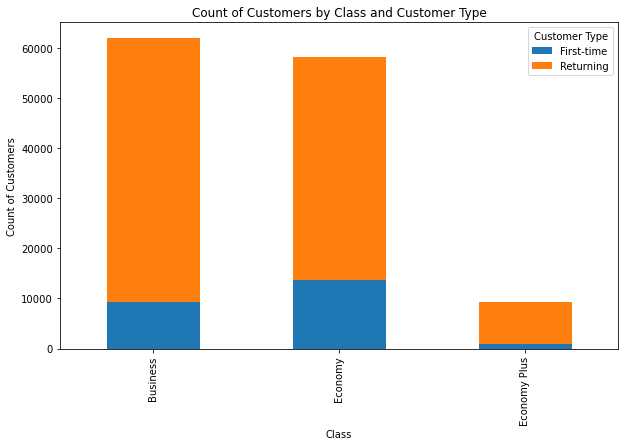

In [48]:
# Group the data by the Class and "Satisfaction" score columns
grouped = dfAir.groupby(['Class', 'Customer Type'])

# Calculate the number of customers in each group
grouped_count = grouped.count()['ID']

# Plot the results
grouped_count.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Class")
plt.ylabel("Count of Customers")
plt.title("Count of Customers by Class and Customer Type")
plt.show()

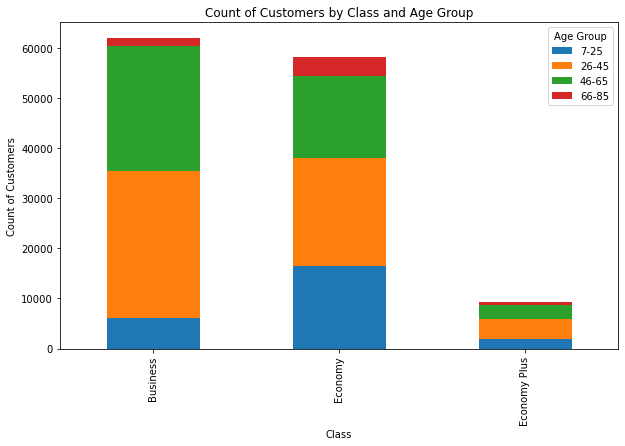

In [49]:
# Group the data by the Class and "Satisfaction" score columns
grouped = dfAir.groupby(['Class', 'Age Group'])

# Calculate the number of customers in each group
grouped_count = grouped.count()['ID']

# Plot the results
grouped_count.unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel("Class")
plt.ylabel("Count of Customers")
plt.title("Count of Customers by Class and Age Group")
plt.show()

In [50]:
dfAir.corr()

,ID,Age,Flight Distance,Departure Delay,Arrival Delay,Departure and Arrival Time Convenience,Ease of Online Booking,Check-in Service,Online Boarding,Gate Location,On-board Service,Seat Comfort,Leg Room Service,Cleanliness,Food and Drink,In-flight Service,In-flight Wifi Service,In-flight Entertainment,Baggage Handling
ID,1.000000,0.020443,0.095027,-0.017506,-0.035657,-0.002056,0.013247,0.079154,0.055428,-0.000019,0.055454,0.052352,0.043914,0.024425,-0.000183,0.078838,-0.023242,0.001944,0.074618
Age,0.020443,1.000000,0.099863,-0.009263,-0.011248,0.036780,0.022294,0.033182,0.207485,-0.000709,0.056743,0.159229,0.038992,0.052575,0.023283,-0.051778,0.015779,0.074990,-0.048192
Flight Distance,0.095027,0.099863,1.000000,0.001992,-0.001935,-0.018901,0.064959,0.073635,0.215082,0.005378,0.111224,0.157825,0.134548,0.095658,0.057136,0.059182,0.006554,0.130518,0.064810
Departure Delay,-0.017506,-0.009263,0.001992,1.000000,0.965291,0.000610,-0.005330,-0.018632,-0.019319,0.005943,-0.030471,-0.027711,0.014339,-0.014553,-0.029351,-0.054329,-0.016046,-0.027166,-0.004425
Arrival Delay,-0.035657,-0.011248,-0.001935,0.965291,1.000000,-0.000942,-0.007033,-0.021705,-0.022730,0.005658,-0.034789,-0.030521,0.011346,-0.016546,-0.031715,-0.059853,-0.017749,-0.030230,-0.007935
Departure and Arrival Time Convenience,-0.002056,0.036780,-0.018901,0.000610,-0.000942,1.000000,0.437697,0.091217,0.072175,0.447411,0.067046,0.008707,0.010634,0.010021,0.001057,0.072166,0.344846,-0.008189,0.070646
Ease of Online Booking,0.013247,0.022294,0.064959,-0.005330,-0.007033,0.437697,1.000000,0.008835,0.404944,0.460155,0.039039,0.028602,0.109341,0.015150,0.030638,0.035356,0.714888,0.046669,0.039215
Check-in Service,0.079154,0.033182,0.073635,-0.018632,-0.021705,0.091217,0.008835,1.000000,0.204215,-0.039294,0.244620,0.189838,0.152715,0.176611,0.085103,0.237737,0.043847,0.119664,0.234732
Online Boarding,0.055428,0.207485,0.215082,-0.019319,-0.022730,0.072175,0.404944,0.204215,1.000000,0.002579,0.154272,0.419169,0.123149,0.329331,0.233524,0.073973,0.457422,0.284008,0.083563
Gate Location,-0.000019,-0.000709,0.005378,0.005943,0.005658,0.447411,0.460155,-0.039294,0.002579,1.000000,-0.029109,0.002493,-0.005146,-0.006066,-0.002825,0.000337,0.338547,0.002751,0.001097


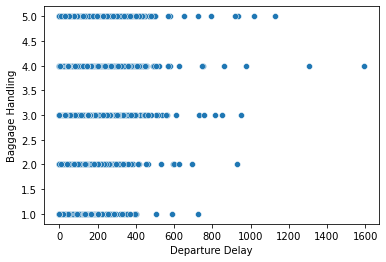

In [53]:
# Create a scatter plot using seaborn
sns.scatterplot(x='Departure Delay', y='Baggage Handling', data=dfAir)

# Show the plot
plt.show()

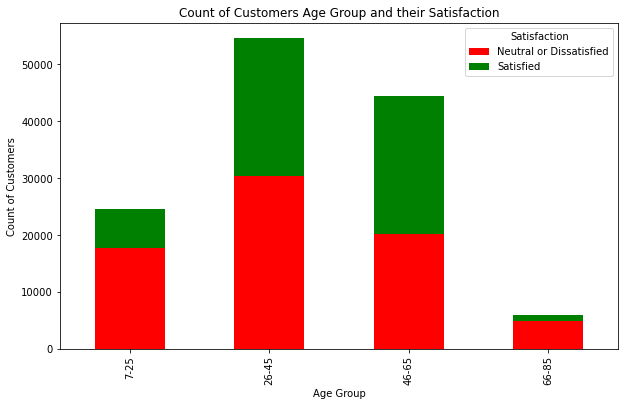

In [71]:
# Group the data by the Age Group and "Satisfaction" score columns
grouped = dfAir.groupby(['Age Group', 'Satisfaction'])

# Calculate the number of customers in each group
grouped_count = grouped.count()['ID']

# Plot the results
colors = ['red', 'green']
grouped_count.unstack().plot(kind='bar', stacked=True, figsize=(10, 6), color = colors)
plt.xlabel("Age Group")
plt.ylabel("Count of Customers")
plt.title("Count of Customers Age Group and their Satisfaction")
plt.show()



